# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [6]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [7]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Write your code here to read the data
path = "/content/drive/MyDrive/Colab Notebooks/EDA-Week3/foodhub_order.csv"
data = pd.read_csv(path)
df = data.copy()

In [9]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [10]:
# Write your code here
data.shape

(1898, 9)

[link text](https://)#### Observations:
There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [11]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**:
There are 5 numerical and 4 object type columns
order_id is unique id per order and does not serve any value - we shall drop this
we have no null entries in any column so missing data does not have to be treated - but we should still look for 0s in numerical columns in case it is not being treated as missing


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [13]:
#checking for repeat customers at all
data.customer_id.value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
143926,1
89574,1
157711,1


In [14]:
#Drop the order id as it has not impact and replace 0s with Nans to check for Null values
data.drop('order_id', axis=1, inplace=True)
cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for col in cols:
  data[col] = data[col].replace(0, np.nan)
data.isnull().sum()

,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no null or missing values to be treated

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [15]:
# Write your code here
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### **Observations:**
Numerical Data:
- Average time for food prep is ~27mins which aligns well with the median
indicating a uniform distribution with not much variance as min is 20 mins and max = 35mins. The min time = 20 mins, mean is 27.4mins and max is 35 mins

other observations
------------------
- Average Cost of the order is 16.5. Min is 4.47 and max is 35.41. 50% of the orders are below 15. indicating a slight right skew in the distribution of the cost of the order
- Average delivery timse is 24mins - again seems to be normally distributed. Also note that food prep time is higher than delivery time, indicating locality frm restuarant to customer base.
- 736 orders had no ratings - this is the highest count for ratings, indicating poor incentive to provide a rating

Categorical Data:
- There are 178 unique restuarants with Shake Shack being most frequented
- 14 different cuisines with American cuisine being the most favored.


### **Question 5:** How many orders are not rated? [1 mark]

In [16]:
# Write the code here
data['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
736 orders were not rated.


In [17]:
#Unique cuisines served
data['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

### Exploratory Data Analysis (EDA)

## Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**COST OF ORDER**  - *Analysis*

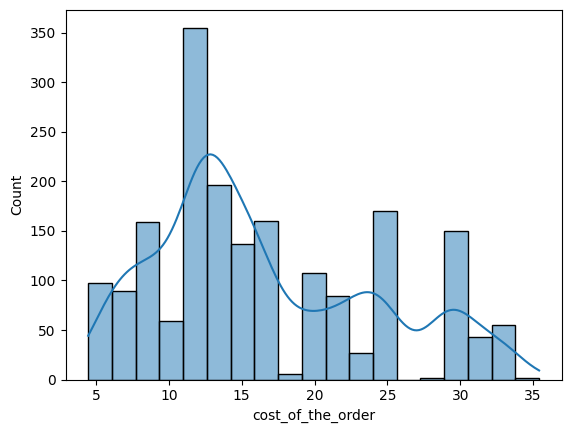

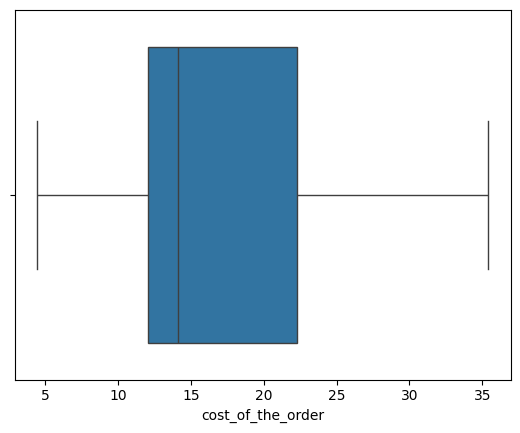

In [18]:
# Cost of the order
sns.histplot(data['cost_of_the_order'], kde= True)
plt.show()
sns.boxplot(data=data, x='cost_of_the_order')
plt.show()




**Observations**:
Cost of the order is somewhat right-skewed (mean > median) 50% or orders are less than 15 and  most of them less than 25.  There are no outliers.

**food_preparation_time** -- *Analysis*




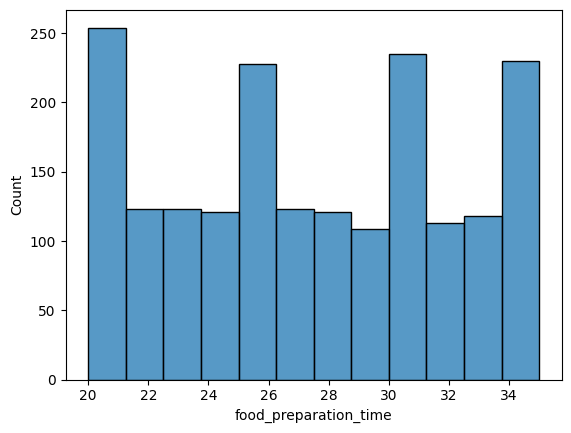

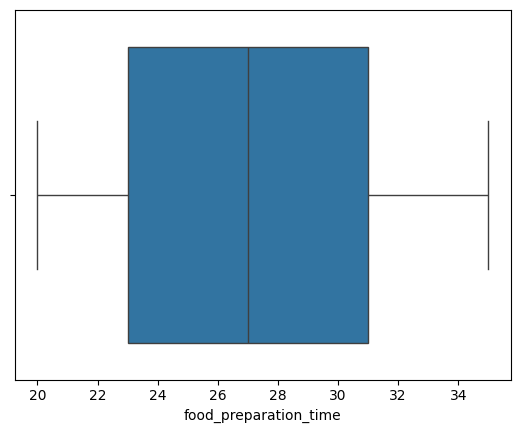

In [19]:
#Food prep time
sns.histplot(data['food_preparation_time'])
plt.show()
sns.boxplot(data=data, x='food_preparation_time')
plt.show()


**Observations** : Food Prep Time does not show a large variation between 20-35 mins. 50% of the orders had food prep within 27 mins. There are no outliers. It is interesting to see spikes at certain times 20-21 min, 25-26 mins and 34-35 mins - indicating certain popular dishes with those prep times.

**Delivery Time** - *Analysis*

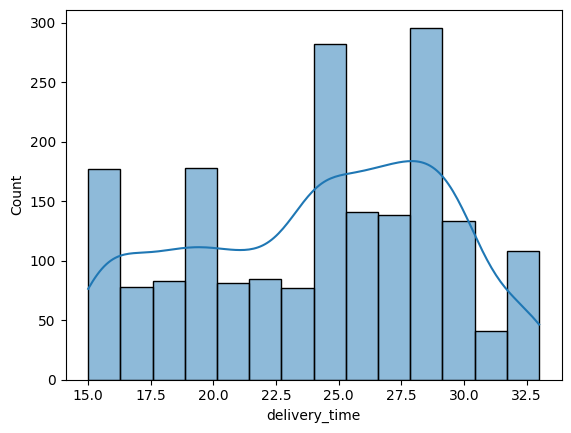

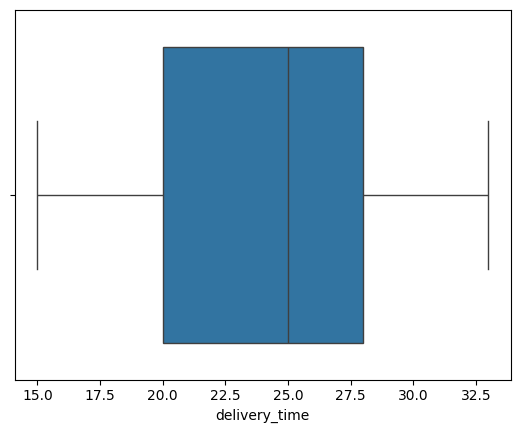

In [20]:
#Delivery time
sns.histplot(data['delivery_time'], kde=True)
plt.show()
sns.boxplot(data=data, x='delivery_time')
plt.show()

**Observations** : Delivery time is  a slightly left skewed distribution with mean < median. 50% of the delivery times are less than 25 mins(15-25 mins). The rest of the  50% orders take time within (25-32.5)mins. From the histogram we can see larger bins from 24.5-30 mins.

**Restaurant Name** -- *Analysis*

In [21]:
#Unique Restaurants
data['restaurant_name'].value_counts()



,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


0.8303477344573233


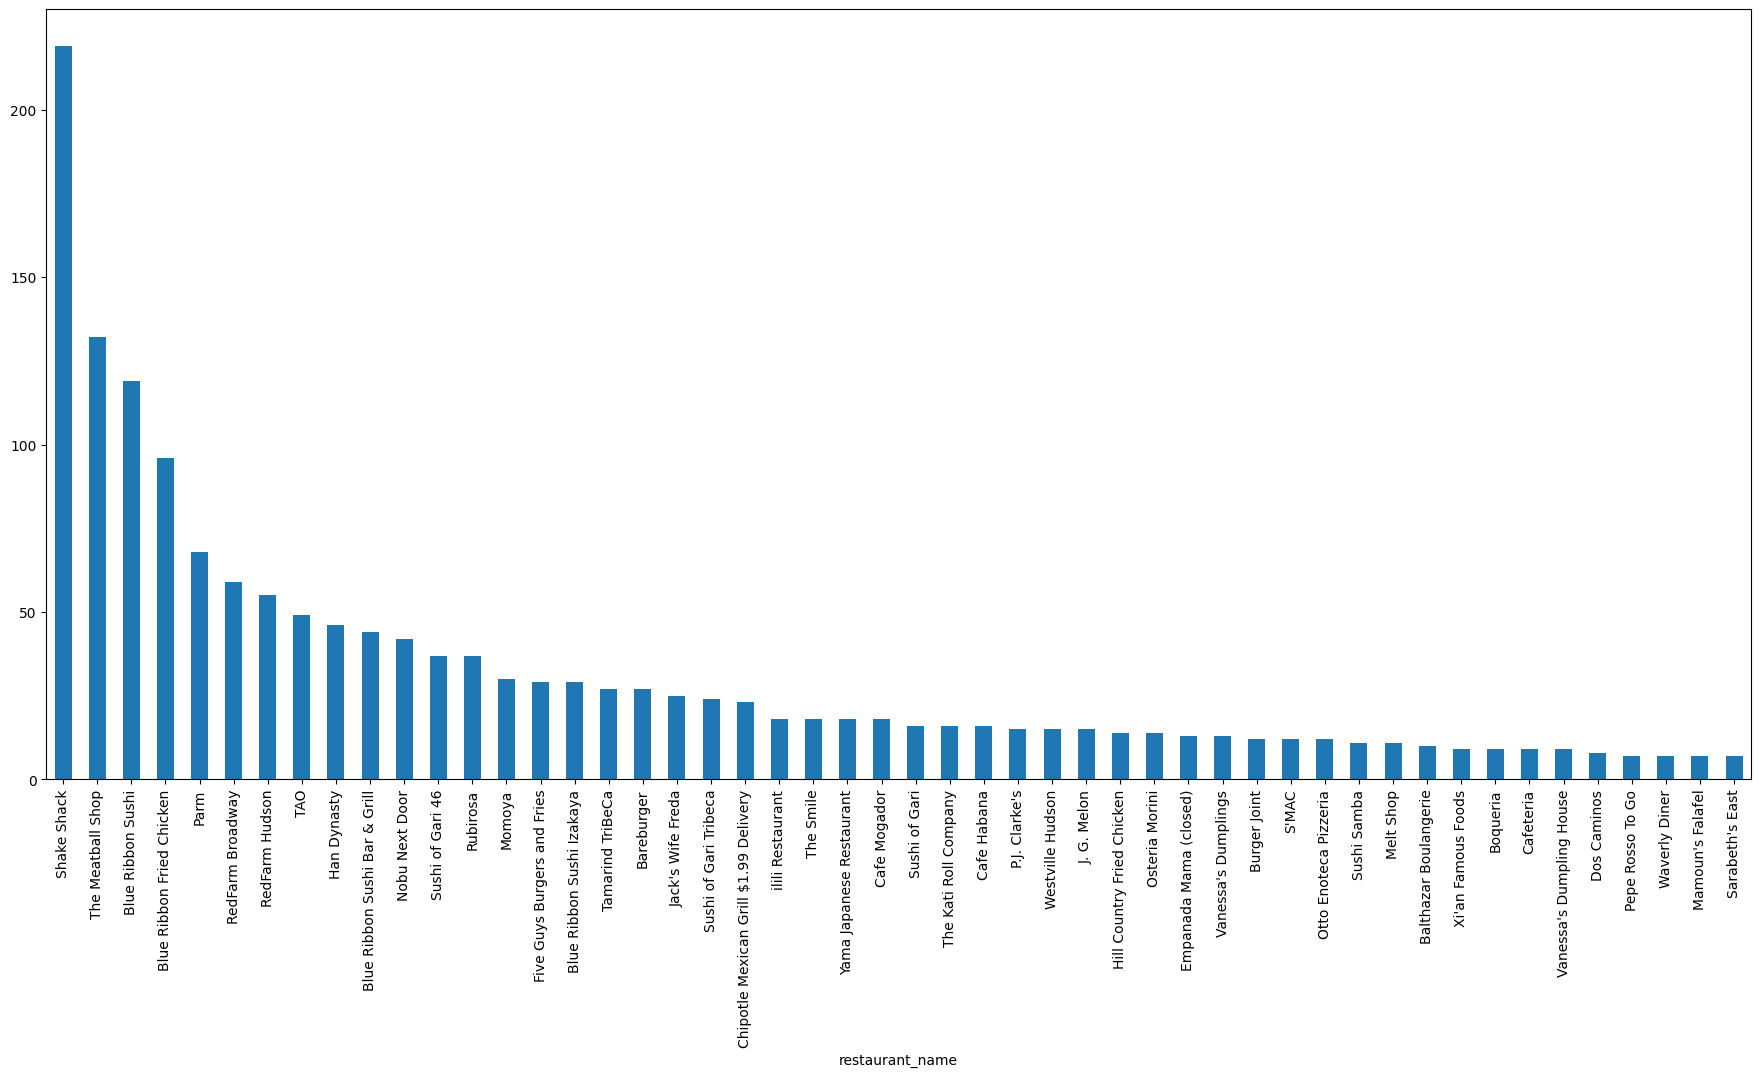

In [22]:
#Top 50 rstaurants in terms of num of orders placed
print(data['restaurant_name'].value_counts(normalize=True).head(50).sum())
plt.figure(figsize=(22,10))
data['restaurant_name'].value_counts().head(50).plot(kind='bar')
plt.show()

**Observations:** There are 178 unique restaurants. 50 of these account for 83% of the orders , which meams some of these are favorites or heavily frequented. Shake Shack is the most popular by a large margin; followed by The Meatball Shop at 132 and Blue Ribbon Sushi at 96.  It would be good to see cost <-> restaurant and delivery time <-> restaurant correlations.

**Customer_id** - *Analysis*

In [23]:
#Repeat customers
data['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
143926,1
89574,1
157711,1


In [24]:
#Repeat customer analysis
df = data[data['customer_id'].isin(data['customer_id'].value_counts().head(10).index)]
df.sort_values(by='customer_id', inplace=True)
df

<ipython-input-24-a2e96664c5d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='customer_id', inplace=True)


,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
264,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,31,23
674,47440,Bareburger,American,8.73,Weekend,5,21,19
579,47440,Bareburger,American,24.20,Weekend,4,23,23
398,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,Not given,33,22
1306,47440,Bareburger,American,15.57,Weekday,4,24,28
...,...,...,...,...,...,...,...,...
800,276192,Sushi of Gari Tribeca,Japanese,8.63,Weekend,5,33,28
1457,276192,12 Chairs,Middle Eastern,29.05,Weekday,5,28,32
1582,276192,Delicatessen,American,24.20,Weekend,4,21,19
1670,276192,Delicatessen,American,32.93,Weekend,4,30,18


**Observations** :  we can see that there are some repeat customers, but not a lot, overall there are 1200 uniques entries here. which means only 1898-1200= 698 repeat orders. It would have been useful to collect the date over which these data were collected so we can see how many repeats in a timeperiod instead of just weekends and weekdays. It may still be useful to see if the repeats are during weekdays - might indicate folk ordering from work. But most of the orders are coming from new customers instead of the same ones.

**Cuisine Type** - *Analysis*

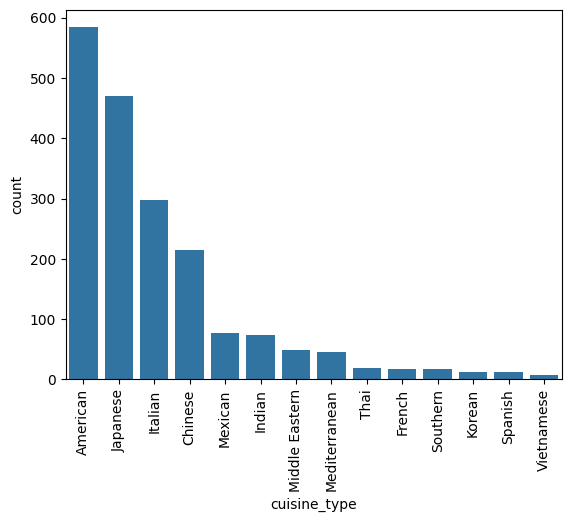

In [25]:
#Cuisine Type Analysis
sns.countplot(data=data, x='cuisine_type',order=data['cuisine_type'].value_counts(ascending=False).index)
plt.xticks(rotation=90);
plt.show()

In [26]:
print(data['cuisine_type'].nunique())
data['cuisine_type'].value_counts(normalize=True)

14


,proportion
cuisine_type,
American,0.307692
Japanese,0.247629
Italian,0.157007
Chinese,0.113277
Mexican,0.040569
Indian,0.038462
Middle Eastern,0.025817
Mediterranean,0.024236
Thai,0.010011


**Observations:** There are 14 different cuisines. American is the most favorite one accounting for , approx 31% of the orders followed by Japanese (approx 25%), Italian (approx 16%) , Chinese(11%) - these 4 account for  approx 83% of the total orders.

**Day of the week** -- *Analysis*

In [27]:
#Day of the week analysis
print(data['day_of_the_week'].value_counts())
print(data['day_of_the_week'].value_counts(normalize=True))

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
day_of_the_week
Weekend    0.711802
Weekday    0.288198
Name: proportion, dtype: float64


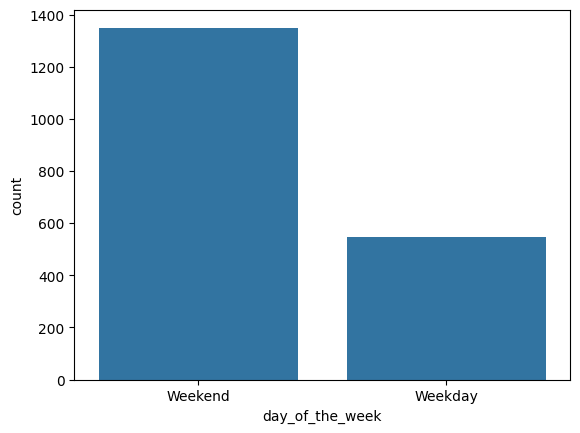

In [28]:
sns.countplot(data=data, x='day_of_the_week')
plt.show()

**Observations:** 71% of the orders are placed on weekends : 1351 orders vs only 29% on weekdays (547) - might indicate that orders are likely less related to the pattern of people working. Infact here it might be useful to have the time of the order - are the ordering in the day when they are at work - or in the evening.

**Rating** -- *Analysis*

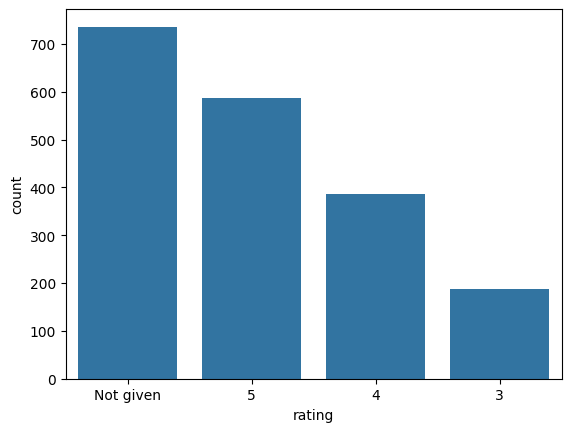

In [29]:
#Ratings analysis
sns.countplot(data=data, x='rating',order=data['rating'].value_counts(ascending=False).index)
plt.show()

In [30]:
print(data['rating'].value_counts(),data['rating'].value_counts(normalize=True))

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64 rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64


**Observations** : 736 orders (almost 39% of all orders) were given no rating by customers. 588 orders got a rating of 5. and 386 orders got a rating of 4. No order was given a rating of less than 3

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:
# Write the code here
print(data['restaurant_name'].value_counts().head(5), data['restaurant_name'].value_counts(normalize=True).head(5).sum())

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64 0.33403582718651215




#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi,  Blue Ribbon Fried Chicken and Parm are the top 5 restuarants in terms of orders received - accounting for 634 orders (33.4% of total orders)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [32]:
# Write the code here
print(data[data['day_of_the_week']=='Weekend']['cuisine_type'].value_counts(), data[data['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().sum())

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64 1351


#### Observations:
American is the most popular cuisine on weekends accouting for 415 orders out of 1351 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [33]:
# Write the code here
data[data['cost_of_the_order']>20]['cost_of_the_order'].count()/data['cost_of_the_order'].count()

np.float64(0.2924130663856691)

#### Observations:
29.2% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
# Write the code here
data['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:
the average deliver time is 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [35]:
# Write the code here
data['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The 3 most frequent customers are those with customer ids = 52832, 47440, 83287. and will receive the vouchers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Generate a heatmap of the numerical variables**





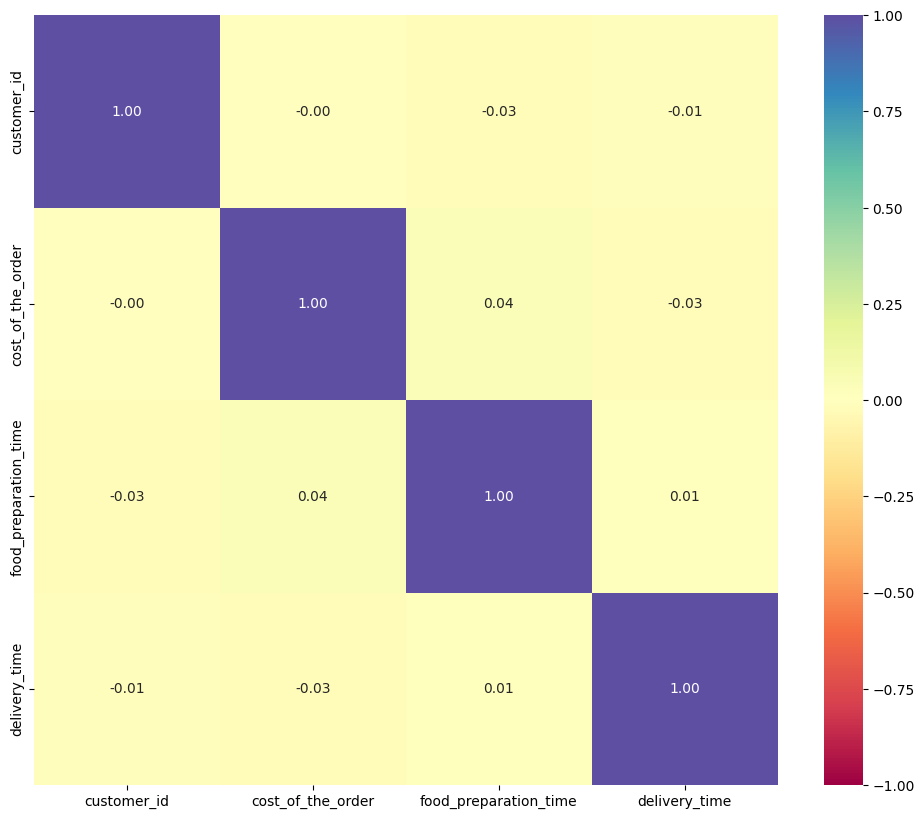

In [36]:
# Heatmap of numerical variables
num_var = data.dtypes[data.dtypes != 'object'].index

corr = data[num_var].corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", annot=True)
plt.show()

**Observations**
*No correlation between numerical variables stands out for further investigation*




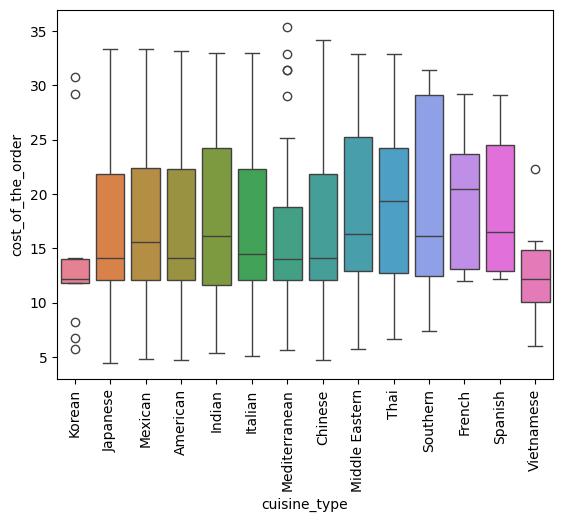

In [37]:
#Relationship between cuisine and cost of the order
sns.boxplot(data=data, x='cuisine_type',y='cost_of_the_order',hue="cuisine_type")
plt.xticks(rotation=90)
plt.show()



In [38]:
import plotly.express as px
bar = px.box(data, x='cuisine_type', y='cost_of_the_order', points='all', color='cuisine_type')
bar.show()
data['cuisine_type'].value_counts(normalize=True)

,proportion
cuisine_type,
American,0.307692
Japanese,0.247629
Italian,0.157007
Chinese,0.113277
Mexican,0.040569
Indian,0.038462
Middle Eastern,0.025817
Mediterranean,0.024236
Thai,0.010011


**Observations**

Except for French and Thai all other cuisines are positively skewed. Mean is > Median. So for most cuisines the cost of the orders are on the lower side
It it interesting to see a clear band - no food is priced between 25-29. This might be something the company might wish to explore.

1.   Korean food is the cheapest (5.77-14.02) - although there are couple of outliers close to 30. which means the more expensive dishes in Korean cuisine are not really ordered much. Vietnamese food is also cheap and normally distributed with no outliers. Both Korean and Vietnamese are not highly popular
2.   Japanese, American, Italian and Chinese food are highly popular- show the similar distribution. 50% of the orders are less than 14-15. 75% are less than 21-23. There is a long tail all the way to  34 but no outliers
3. Mexican and Indian foods have a similar distribution in spread and number of orders with 50% of orders less than 16-17, though Indian food is a bit more expensive with 75% orders less than 24.2 compared to 22.5 for Mexican
4. Mediterranean food has a few outliers on the high end, infact the most expensive order in the data set is a mediterranean outlier. Most of the orders, though  (75%) are under 20
5. Middle eastern has the highest Q1 (12.23) which means most orders for middle eastern food are more expensive than other cuisines. 50% of the orders for middle eastern food are under 16 while 75% are under 26




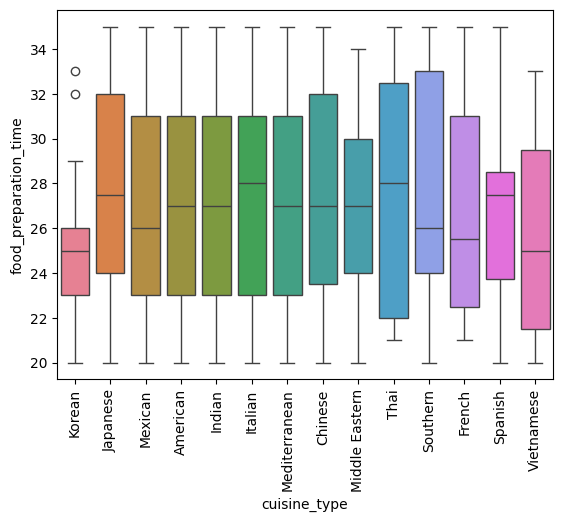

In [39]:
#Relationship between cuisine and food prep time
sns.boxplot(data=data, x='cuisine_type',y='food_preparation_time',hue="cuisine_type")
plt.xticks(rotation=90)
plt.show()
bar = px.box(data, x='cuisine_type', y='food_preparation_time', points='all', color='cuisine_type')
bar.show()


**Observation**


1.   Korean and Vietnamese food take the least time to make however these dont account for a large number of orders so food prep time is not an indication of the number of orders
2.   In general most cuisines show a wide range of food prep and the orders for a cuisine are well spread and not particularly aligned to a food prep time with th lower fence alighning at 20 and upper fence at 35.



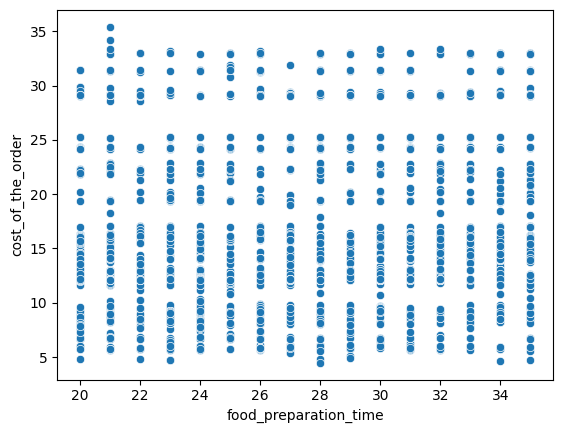

In [40]:
#Relationship between food prep time and cost of the order
sns.scatterplot(data=data, x='food_preparation_time', y='cost_of_the_order')
plt.show()

**Observation**
There does not seem to be any relation between cost of the order and food prep time which is what the heatmap had also indicated

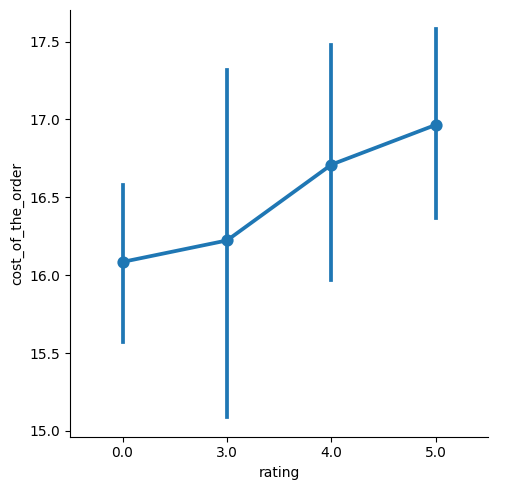

In [41]:
#Relationship between cost of the order and rating
df_num_rating = data.copy()
df_num_rating['rating']= df_num_rating['rating'].replace('Not given', '0')
df_num_rating['rating'] = df_num_rating['rating'].astype(float)

sns.catplot(data=df_num_rating, x='rating',y='cost_of_the_order', kind='point');
plt.show()


**Observations** :
while not a strong correlation, we can see some correlation between price of the order and rating where it seems that higher the price of the order has resulted in an on average better rating

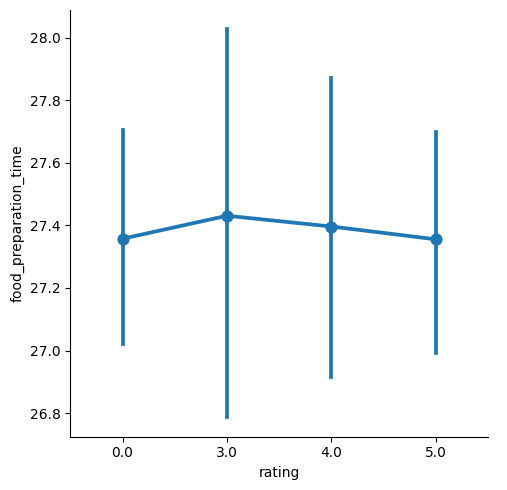

In [42]:
#Relationship between rating and food prep time
sns.catplot(data=df_num_rating, x='rating', y='food_preparation_time',  kind='point' )
plt.show()

**Observations**
If we ignore the no ratings (coded as 0) then it seems like for lower  food_prep_time the ratings are higher

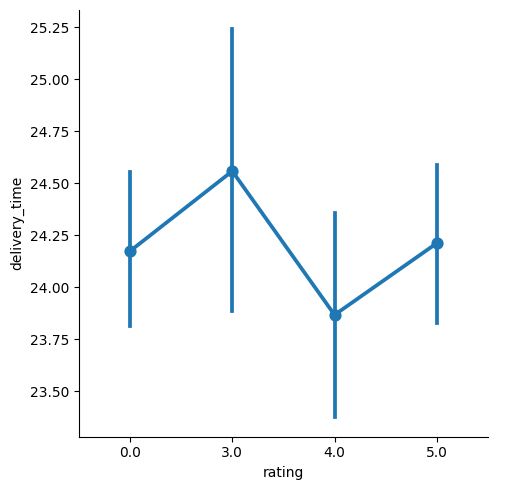

In [43]:
#Relationship between rating and delivery time
sns.catplot(data=df_num_rating, x='rating', y='delivery_time', kind='point');

**Observations**:
Overall as delivery time decreased we see ratings go up from 3 to 4 , however this trend is not replicated from 4-5 ratings. It seems that the food delivery time at a level of 24.50 and above does cause rating to be 3 whereas lower than that might lead to better ratings

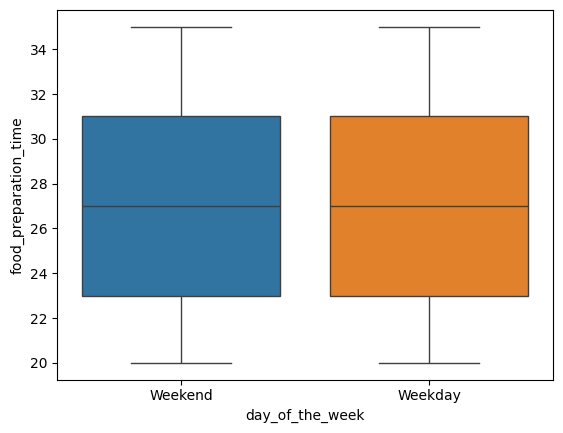

In [44]:
#Relationship between day of the week and food prep time
sns.boxplot(data=df_num_rating, x="day_of_the_week", y="food_preparation_time", hue='day_of_the_week');

**Observation**
There is no difference in the food prep time for a weekday or a weekend- indicating that the higher number of orders are not saturating the working of the chefs at the restaurants

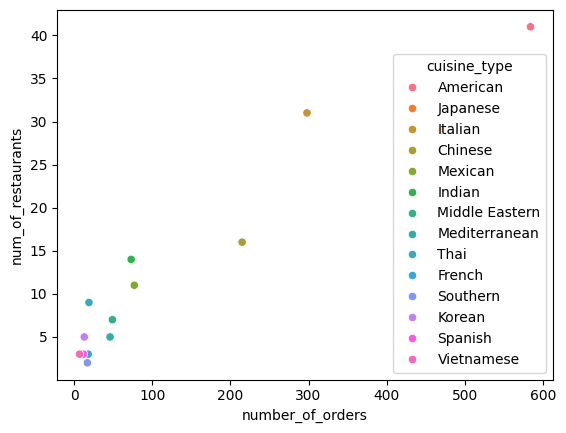

,cuisine_type,number_of_orders,num_of_restaurants,ratio
0,American,584,41,14.243902
1,Japanese,470,29,16.206897
2,Italian,298,31,9.612903
3,Chinese,215,16,13.437500
4,Mexican,77,11,7.000000
5,Indian,73,14,5.214286
6,Middle Eastern,49,7,7.000000
7,Mediterranean,46,5,9.200000
8,Thai,19,9,2.111111
9,French,18,3,6.000000


In [45]:
 #Cuisine type and restaurant and num of orders
df_cuisine = data[['restaurant_name','cuisine_type']].copy()
df_cuisine.drop_duplicates(inplace=True)
check=data['cuisine_type'].value_counts().reset_index()
check2 = df_cuisine['cuisine_type'].value_counts().reset_index()
df_rt_cuisine = check.merge(check2, on='cuisine_type', how='inner')
df_rt_cuisine.rename(columns={'count_x':'number_of_orders','count_y':'num_of_restaurants'}, inplace=True)
df_rt_cuisine['ratio']= df_rt_cuisine['number_of_orders']/df_rt_cuisine['num_of_restaurants']
sns.scatterplot(data=df_rt_cuisine, x='number_of_orders', y='num_of_restaurants', hue='cuisine_type')
plt.show()
df_rt_cuisine.sort_values(by='number_of_orders', ascending=False)


**Observations**
Fairly linear relationshop between number of cuisine type restaurants and the number of orders. The number of Chinese restaurants are half those of Italian but the orders are fairly comparable.

In [46]:
#Analysis of restuarant names and ratings
dfrt = data[['restaurant_name','rating']].copy()
dfrt=dfrt.groupby(['restaurant_name', 'rating']).value_counts().reset_index()
df_pivot = pd.pivot_table(dfrt, values='count', index='restaurant_name', columns='rating',aggfunc='sum').fillna(0)
flattened = pd.DataFrame(df_pivot.to_records())
flattened.sort_values(by='Not given', ascending=False).head(20)

,restaurant_name,3,4,5,Not given
136,Shake Shack,23.0,50.0,60.0,86.0
153,The Meatball Shop,10.0,21.0,53.0,48.0
21,Blue Ribbon Sushi,16.0,25.0,32.0,46.0
20,Blue Ribbon Fried Chicken,11.0,21.0,32.0,32.0
109,Parm,9.0,16.0,14.0,29.0
66,Han Dynasty,3.0,7.0,13.0,23.0
22,Blue Ribbon Sushi Bar & Grill,2.0,5.0,15.0,22.0
122,RedFarm Hudson,9.0,10.0,15.0,21.0
145,TAO,3.0,12.0,13.0,21.0
143,Sushi of Gari 46,3.0,7.0,7.0,20.0


Top 20  in revenues from restaurants: 
                            restaurant_name      sum       mean  median  count
136                            Shake Shack  3579.53  16.344886  15.280    219
153                      The Meatball Shop  2145.21  16.251591  14.070    132
21                       Blue Ribbon Sushi  1903.95  15.999580  14.020    119
20               Blue Ribbon Fried Chicken  1662.29  17.315521  14.335     96
109                                   Parm  1112.76  16.364118  14.670     68
121                       RedFarm Broadway   965.13  16.358136  14.070     59
122                         RedFarm Hudson   921.21  16.749273  14.120     55
145                                    TAO   834.50  17.030612  15.280     49
66                             Han Dynasty   755.29  16.419348  13.900     46
22           Blue Ribbon Sushi Bar & Grill   666.62  15.150455  14.675     44
125                               Rubirosa   660.45  17.850000  15.380     37
143                     

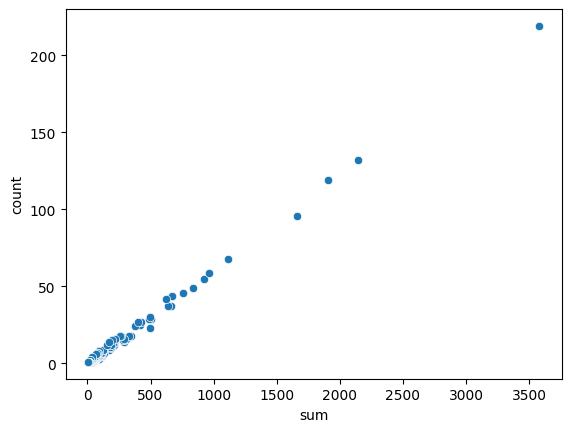

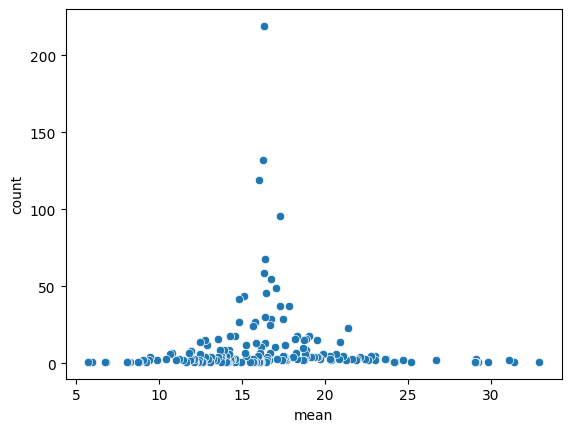

In [47]:
#Relationship between Revenue, Count of orders and restaurants
restaurant_ordercosts=data.groupby('restaurant_name')['cost_of_the_order'].agg(['sum', 'mean', 'median', 'count']).reset_index()
restaurant_ordercosts.sort_values(by='sum', ascending=False, inplace=True)
print("Top 20  in revenues from restaurants: \n", restaurant_ordercosts.head(20))
print("Top 20  in revenues from restaurants: \n", restaurant_ordercosts.head(20)['sum'].sum()/restaurant_ordercosts['sum'].sum())
restaurant_ordercosts.sort_values(by='mean', ascending=False, inplace=True)
print("\n\nTop 20  in average order cost from restaurants: \n", restaurant_ordercosts.head(20))
sns.scatterplot(data=restaurant_ordercosts, x='sum', y='count')
plt.show()
sns.scatterplot(data=restaurant_ordercosts, x='mean', y='count')
plt.show()

**Observations**
1. It seems there is no intersection between the mean most expensive restaurants and the max( cost of total orders) . This would mean that the most expensive restaurants are much less frequented and cannot be the main source of revenue
2. The top 20 restaurants in count of orders also are the top 20 in revenue generation indicating a linear relationship between total cost and number of orders. So we do not have super expensive restaurants that generate the highest revenue nor the super inexpensive ones
3. The sweat spot for order cost is 10-25

top 20  in Delivery_time from restaurants: 
                  restaurant_name       mean  median  count
132              Sarabeth's West  33.000000    33.0      1
68            Haru Gramercy Park  32.000000    32.0      1
148                   Taro Sushi  32.000000    32.0      1
58              Frank Restaurant  31.000000    31.0      1
64                        Haandi  30.500000    30.5      2
92         Le Zie 2000 Trattoria  30.000000    30.0      1
34                     Carmine's  30.000000    30.0      3
41             Crema Restaurante  30.000000    30.0      1
39        Cipriani Le Specialita  30.000000    30.0      1
126                    Rye House  30.000000    30.0      1
51              Dos Caminos Soho  30.000000    30.0      1
113                Philippe Chow  30.000000    30.0      1
38                   Chote Nawab  30.000000    30.0      1
6                     Amy Ruth's  29.333333    29.0      3
63   Grand Sichuan International  29.250000    29.0      4
77         

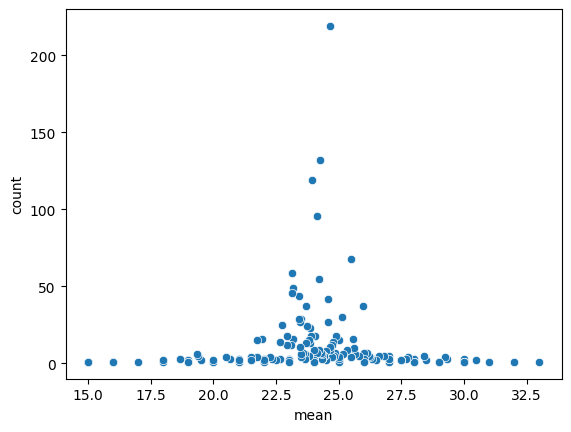

In [48]:
#Relationship between delivery_time and restaurants
restaurant_dtime = pd.DataFrame()
restaurant_dtime=data.groupby('restaurant_name')['delivery_time'].agg([ 'mean', 'median', 'count']).reset_index()
restaurant_dtime.sort_values(by='mean', ascending=False, inplace=True)
print("top 20  in Delivery_time from restaurants: \n", restaurant_dtime.head(20))
sns.scatterplot(data=restaurant_dtime, x='mean', y='count')
plt.show()


**Observations**
There does not seem to be any great correlation between delivery times and number of orders. The delivery_times between 20-27 are the most dense in terms of number of orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [49]:
# Write the code here
#convert rating to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
rating_count = data.groupby(['restaurant_name'])['rating'].count().reset_index()
rating_count.rename(columns={'rating':'rating_count'}, inplace=True)
rating_count_filtered = rating_count[rating_count['rating_count']>50]

rating_mean = data.groupby(['restaurant_name'])['rating'].mean().reset_index()
rating_mean.rename(columns={'rating':'rating_mean'}, inplace=True)
rating_mean_filtered = rating_mean[rating_mean['rating_mean']>4]

#merge the two dataframes
filtered_restaurants = pd.merge(rating_count_filtered, rating_mean_filtered, on='restaurant_name', how='inner')
filtered_restaurants.sort_values(by='rating_count', ascending=False)

,restaurant_name,rating_count,rating_mean
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905
1,Blue Ribbon Sushi,73,4.219178
0,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
(1) The four restaurants with greater than 50 ratings with a mean rating value greater than 4 are : Shake Shack, The Meatball Shop, Blue Ribbon Sushi and BLue Ribbon Fried Chicken

(2) The Shake Shack has the maximum number of ratings while The Meatball Shop has less number of ratings but the highest average rating.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [50]:
# Write the code here
def revenue(row):
  if row['cost_of_the_order']>20:
    return row['cost_of_the_order']*0.25
  elif row['cost_of_the_order']>5:
    return row['cost_of_the_order']*0.15
  else:
    return 0

data['revenue'] = data.apply(revenue, axis=1)
Total_Revenue = data['revenue'].sum()
print(Total_Revenue)

6166.303


#### Observations:
The total revenue generated by the company across these orders is 6166.03

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [51]:
# Write the code here
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data[data['total_time']>60]['total_time'].count()/data.shape[0]*100

np.float64(10.537407797681771)

#### Observations:
10.54% of the orders take more than 60 mins frm the time of placement to delivery

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


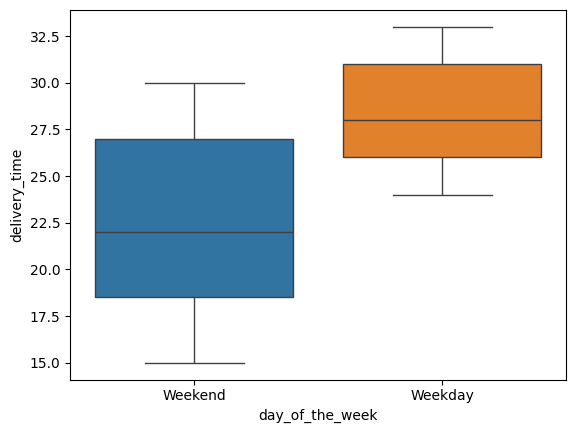

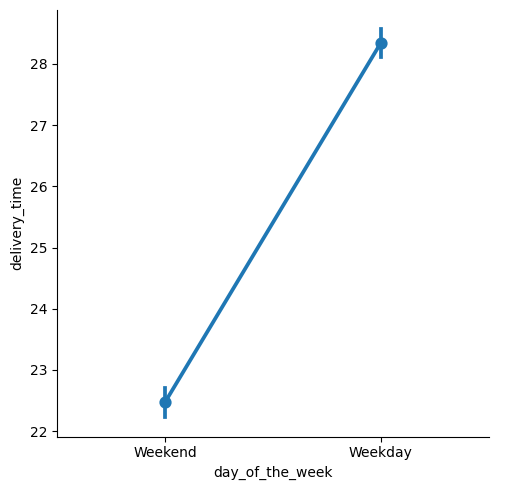

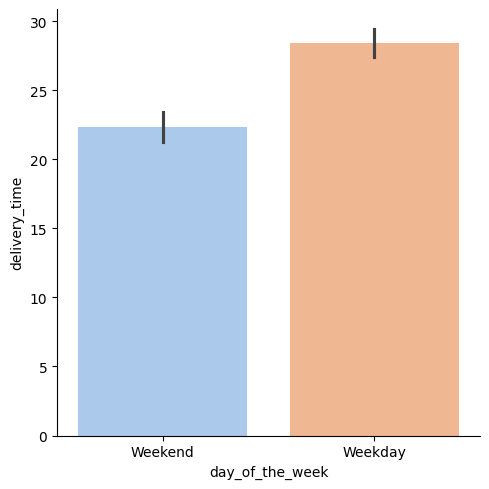

In [52]:
# Write the code here
print(data.groupby('day_of_the_week')['delivery_time'].mean().reset_index())
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time', hue='day_of_the_week')
plt.show()
sns.catplot(x='day_of_the_week', y='delivery_time', data=data, kind='point')
plt.show()
sns.catplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week', kind='bar', palette='pastel');


#### Observations:
The mean delivery time on a weekend is much smaller approx 22 mins compared to that on a weekday which is approx 28 mins. This could be because (1) people ordering on weekends are closer to those restaurants they are ordering from versus on weekdays when they may be at work which might be further (2) there are more delivery people available (3) There is less traffic

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
**Insights**
We analyzed a dataset of 1897 food orders from 178 restaurants serving 14 unique cuisines. The main features analysed were :
Customer Id with 9 different features. The main features explored are

1.   Customer Id - There were about 698 repeat orders. Since we dont know the length of time over which these data were collected its difficult to gauge whether this is a good rate or not
2.   Weekend/Weekday - Number of orders were more than 2x larger on weekend than on weekday (1351/547) or 71%-29% - Indicating likely that this may be primarily a residential area and people who live there are mostly working and they may use a separate service when they travel to a different location for weekdays.
3. Food Preparation Time - Is well distributed and remains the same over weekend and weekdayand not much info can be gleaned
4. Delivery Time - Is interesting to see that
  (a) Mean Delivery time is less than Mean food prep time - this indicates a location bias that orders may be limited to close by area only.
  (b) Delivery time is less on weekends than on weekdays even though the orders are much larger on weekends. This is worth exploring more - is this because   (i) multiple orders can be delivered at the same time because density or orders in an area is higher and/or (ii) because there are more delivery people working on the weekend and/or (iii) Traffic changes, less traffic on weekends.

5. Restaurant Name : There are a few favorites with top 50 restaurants accounting for 83% of the orders. The top 5 most frequented are :
- Shake Shack	219
- The Meatball Shop	132
- Blue Ribbon Sushi	119
- Blue Ribbon Fried Chicken	96
- Parm	68
5. Cuisine Type: American is the most popular cuisine type, followed by Japanese and Italian. These 3 have a similar cost profile as well
- American	30.8%
- Japanese	24.7%
- Italian	15.7%
- Chinese	11.3%
- Mexican	4.1%
- Indian	3.8%

6. Cost of the order:
For most cuisines the cost of the orders are on the lower side 50% orders are less than 15 and 75% less than 23. There are no orders over 35 and no outliers indicating no catering or party orders more for individual or small single family consumption.  There is a weak correlation between cost of the order and food prep.
1. It it interesting to see a clear band - no food is priced between 25-29. This might be something the company might wish to explore.
2.   Japanese, American, Italian and Chinese food are highly popular- show the similar distribution. 50% of the orders are less than 14-15. 75% are less than 21-23. There is a long tail all the way to  34 but no outliers
3. Mexican and Indian foods have a similar distribution in spread and number of orders with 50% of orders less than 16-17, though Indian food is a bit more expensive with 75% orders less than 24.2 compared to 22.5 for Mexican


7. Ratings
*  There is a large number 736 orders for which ratings were not given - indicating poor incentive to provide ratings.
* For the ratings provided:
1.  Ratings are lower for higher delivery times and higher food prep times - indicating correlation between rating and the time it took to get the food. However the range is not wide as in just a couple of mins between getting a 3 or a 5 - so it may be a coincidence
2.  Ratings are generally a bit better for higher cost food.
3. There is no rating below 3 and rating distribution (see below) indicates a generally satisfied clientele since most of the ratings that are given are 5/4 (51% of ratings  vs 10% for 3)
- Not given    736
- 5            588
- 4            386
- 3            188


### Recommendations:

*  Need to provide incentives to collect more ratings - provide 5% or 1 off for everytime a rating is provided - run this for like 2/3 weeks
* Important to add more features such as location from which order is placed, location of restaurant, date, time of order placement - In order to determine why we dont have more repeats or how to increase the number of repeat orders and why we see a decline in orders on weekdays and to perform a day of week analysis ( for impact on delivery times and number of orders). This will also give some idea on density of orders from a specific locaiton
* improve the delivery time on weekdays (maybe adding more delivery staff)
* Investigate why no orders are priced in 25-29 range. Run a hypothesis test and run a special to change some of the higher priced items to this range to see if there is a better uptake .

---